In [113]:
from math import log10, exp, sqrt
import matplotlib.pyplot as plt
%matplotlib inline

def pr_tp_pq(ob, pt, gt, gr, freq):
    # calcula la potència rebuda en el model de terra plana amb
    # obstacles seguint el mètode de Picquernard
    # @ob - array de tuples amb el perfil, 
    #       el primer valor és la distància de l'obstacle [Km] des de l'emissor
    #       el segon valor és l'alçada de l'obstacle en [m]
    #       la primera tupla correspon a l'emissor
    #       la darrer tupla correspon al receptor
    #       Atenció !!: 
    #       el primer punt es un cim, el seguent sempre una vall!!!
    #       ex. ob=[(0,500), (2,800), (3,300), (5,1100), (7,300), (8,500), (9,100)]
    # @pt - potència del transmissor [dBm]
    # @gt - guany del transmissor [dB]
    # @gr - guany del receptor [dB]
    # @freq - Freqüència de treball [MHz]
    # @return - potència rebuda [dBm]
    primer=0
    darrer=len(ob)-1
    h1=ob[primer][1] # alçada emissor [m]
    h2=ob[darrer][1] # alçada receptor [m]
    d=(ob[darrer][0]-ob[primer][0])*10**3 # distància emissor-receptor [m]    
    print 'h1 %s[m] h2 %s[m] dE-R %s[m] freq[MHz] %s' % (h1, h2, d, freq)   
    # calculam potència sense atenuacions
    pr=pt+gt+gr+20*log10(h1*h2)-40*log10(d)+20*log10(1.0*40/freq)
    print 'Pr sense atenuació obstacles: %s [dBm]' % (pr,)
    J=calculaJ(ob, freq)
    print 'Atenuació obstacles: %s [dB]' % (J,)
    print 'Potència rebuda: %s [dBm]' % (pr-J,)
    
    
def pendent(x1, y1, x2, y2):
    # torna pendent recta entre dos punts
    return 1.0*(y2-y1)/(1.0*(x2-x1))

def creuament(x1, y1, x2, y2, u):
    # torna punt de creuament entre la recta i la vertical d'equació x=u
    # y=m x - m x1 + y1 eq. punt-pendent de la recta
    m=pendent(x1,y1,x2,y2)
    #print 'pendent %s x1: %s y1: %s x2: %s y2:%s vertical: %s' % (m,x1,y1,x2,y2,u)
    return m*u-1.0*m*x1+y1

def calculaJ(ob, freq):
    perfil(ob)
    darrer=len(ob)-1
    dr=ob[darrer][0]*10**3 # distància darer (receptor)
    ar=ob[darrer][1] # alçada darrer (receptor)
    J=0 # atenuació acumulada
    for a in range(1, len(ob)-1, 2):
        #print 'punt en %s' % (ob[a][0]*10**3,)
        if (a==1):
            da=ob[a-1][0]*10**3
            aa=ob[a-1][1]
        else:
            da=ob[a-2][0]*10**3
            aa=ob[a-2][1]
            
        #print 'punt anterior %s %s' % (da, aa)
        cr=creuament( da,  # m punt anterior
                      aa, # alçada punt anterior
                      dr, # distància receptor
                      ar, # alçada receptor 
                      ob[a][0]*10**3 # abscisa punt actual
                    )        
        #print 'creuament a %s' % (cr,)
        plt.plot([da,dr],[aa,ar]) # dibuixam recta
        plt.plot([ob[a][0]*10**3,ob[a][0]*10**3], [cr, ob[a][1]]) # dibuixam vertical
        
        # parametre hp del punt actual
        hp=ob[a][1]-cr
                
        if cr>0:
            d1=ob[a][0]
            d2=dr-ob[a][0]
            j=at_supl(freq, hp, d1, d2)
            #print "hp %s d1 %s d2 %s j %s" % (hp,d1,d2,j)
            # acumulam atenuació
            J+=j
    return J

def at_supl(freq, hp, d1, d2):
    # calcula l'atenuació suplementària J [dB]
    # @freq - freqüència [MHz]
    # @hp - distància entre la recta de tall i el cimerol [m]
    # @d1 - distància entre l'emissor i el centre de l'obstacle [Km]
    # @d2 - distància entre centre de l'obstacle i receptor [Km]
    # @return - atenuació de l'obstacle [dB]
    r1=sqrt(((3*10**8)/freq)*((d1*d2)/(d1+d2))) # radi de la zona de fresnel
    v=-1.0*sqrt(2)*hp/r1
    if (1<=v):
        return 0
    elif (0<=v and v<=1):
        return 20*log10(0.5+.62*v)
    elif (-1<=v and v<=0):
        return 20*log10(0.5*exp(0.95*v))
    elif (-2.4<=v and v<=-1):
        return 20*log10(0.4-sqrt(0.1-(0.1*v+.4)**2))
    else:
        return 20*log10(-0.225/v)
    
def perd_n(n):    
    # torna la pèrdua deguda a l'obtacle n
    # @n - ordinal de l'obstacle (el primer és el primer després de l'emissor)
    return

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
def punts_d(ob):
    # torna els punts kilomètrics en m
    d=()
    for a in range(0, len(ob)):
        d=d+(1.0*ob[a][0]*10**3,)
    return d

def punts_a(ob):
    # torna les alçades en m
    d=()
    for a in range(0, len(ob)):
        d=d+(1.0*ob[a][1],)
    return d

def perfil(ob):
    # ploteja el perfil    
    setup_graph('perfil', 'distancia [m]', 'alcada [m]')
    plt.plot(punts_d(ob), punts_a(ob))
    

h1 500[m] h2 100[m] dE-R 9000[m] freq[MHz] 950
Pr sense atenuació obstacles: -88.7035725701 [dBm]
Atenuació obstacles: -33.5446436086 [dB]
Potència rebuda: -55.1589289614 [dBm]


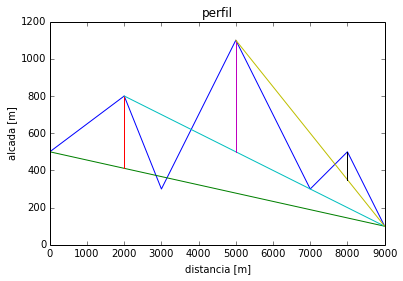

In [114]:
ob=[(0,500), (2,800), (3,300), (5,1100), (7,300), (8,500), (9,100)]
pr_tp_pq(ob, 1, 1, 1, 950)